## Setup

Install dependencies and ensure that Python version >= 3.10. Restart the Kernel if needed.

In [1]:
%pip install requirements

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement requirements (from versions: none)
ERROR: No matching distribution found for requirements
Note: you may need to restart the kernel to use updated packages.


In [4]:
import sys
import os

import pandas as pd
import json
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ipywidgets as widgets

sys.path.append("..")
import codex
import src.output as output
import tutorial_materials.build.tutorial_functions as tutorials

with open("tutorial_materials/input/demo_input-dataset_eval.json") as f:
    codex_input = json.load(f)
    output_path, strengths = codex.input_parser.define_experiment_variables(codex_input)

# Dataset Evaluation
Dataset evaluation computes the combinatorial coverage ($CC_t$) over the provided dataset for a specified strength $t$ and a defined universe. CC gives the proportion of t-way interactions present in the dataset out of all t-way interactions possible with respect to the universe definition. Recall that a t-way combination is a selection of t of the k features; there are k choose t of these. 

$$
CC_t = \frac{|D_t|}{U_t|}
$$

where $|D_t|$ is the cardinality of a dataset and $|U_t|$ is the cardinality of a universe.

Consider this example abstract dataset containing feature columns "A", "B", "C", "D" as well as a unique sample ID column and label column(s). Multiple strengths can be provided in one input file to obtain a set of $CC_t$ outputs. 

In [5]:
dataset_full = pd.read_csv(
    os.path.join("tutorial_materials", "datasets_tabular", "abstract_native.csv")
).drop("Unnamed: 0", axis=1)
display("DATASET", dataset_full.head())

with open(os.path.join("tutorial_materials", "binning", "bins-abstract.txt")) as f:
    print("BINNING SCHEME:")
    print(f.read())

print("\nSTRENGTHS:")
print("t =", strengths)

'DATASET'

,id,A,B,C,D,lab
0,0,a2,17.794,c2,d4,l3
1,1,a2,13.679,c3,d3,l2
2,2,a1,11.782,c1,d1,l1
3,3,a2,22.230,c3,d3,l1
4,4,a2,23.236,c2,d1,l1


BINNING SCHEME:
A: a1;a2
B: [0.0,10.0);[10,20.0);[20.0,30.0]
C: c1;c2;c3
D: d1;d2;d3;d4

STRENGTHS:
t = [1, 2, 3, 4]


#### Input file

The input file defines all the necessary components for the experiment configuration.

In [ ]:
with open("tutorial_materials/input/demo_input-dataset_split_evaluation.json") as f:
    codex_input = json.load(f)
    output_path, strengths = codex.input_parser.define_experiment_variables(codex_input)

display(codex_input)

{'mode': 'dataset split evaluation',
 'codex_directory': './',
 'config_id': '__DEMO-dataset_split_evaluation_results',
 'dataset_name': 'Abstract',
 'model_name': '',
 'data_directory': 'tutorial_materials/datasets_tabular/',
 'dataset_file': 'abstract_skew.csv',
 'features': ['A', 'B', 'C', 'D'],
 'bin_file': 'tutorial_materials/binning/bins-abstract-disc.txt',
 'sample_id_column': 'id',
 'universe': None,
 'use_augmented_universe': False,
 'counting_mode': 'label_exclusive',
 't': [1, 2, 3],
 'split_folder': 'tutorial_materials/splits/abstract_split',
 'split_file': 'split_00.json',
 'performance_folder': 'tutorial_materials/performance/abstract_perf',
 'performance_file': 'performance_00.json',
 'metric': 'accuracy',
 'sdcc_direction': 'train-test',
 'timed_output': False}

#### Universe
With the dataset and a binning file, a universe that describes the input space with all of its features and levels can be defined. Below is defined universe for the dataset.

In [7]:
universe, dataset, features = codex.codex_universe.define_input_space(codex_input)
display(universe)

{'features': ['A', 'B', 'C', 'D'],
 'levels': [['a1', 'a2'],
  ['[0.0,10.0)', '[10,20.0)', '[20.0,30.0]'],
  ['c1', 'c2', 'c3'],
  ['d1', 'd2', 'd3', 'd4']]}

### Experiment run

With a dataset, values for $t$, and a defined universe, dataset evaluation can be run.

In [8]:
with open("tutorial_materials/input/demo_input-dataset_eval.json") as f:
    codex_input = json.load(f)

results_full = codex.run(codex_input)
print("Combinatorial coverage for t=1 interactions:", results_full[1]["CC"])
print("Combinatorial coverage for t=2 interactions:", results_full[2]["CC"])
print("Combinatorial coverage for t=3 interactions:", results_full[3]["CC"])

Combinatorial coverage for t=1 interactions: 1.0
Combinatorial coverage for t=2 interactions: 1.0
Combinatorial coverage for t=3 interactions: 1.0


<Figure size 432x288 with 0 Axes>

### Experiment results

CC results of 1.0 indicates that the dataset fully covers the input space. Every interaction possible appears in the data at least once. CODEX also reports other dataset evaluation results per $t$ including the counts of each appearing interaction as well as interactions that are possible, but missing from the dataset.

However, CODEX can provide further analysis than the CC value. Two datasets exhibiting full coverage over the same universe can still have drastically different distributions of appearances. CODEX extends the analysis by producing various visualazations expressing different aspects of coverage. In addition to mode-specific visualizations, CODEX generates coverage maps of various aspects of coverage at the interaction level.

Refer to <> for more on interepreting each visualization.

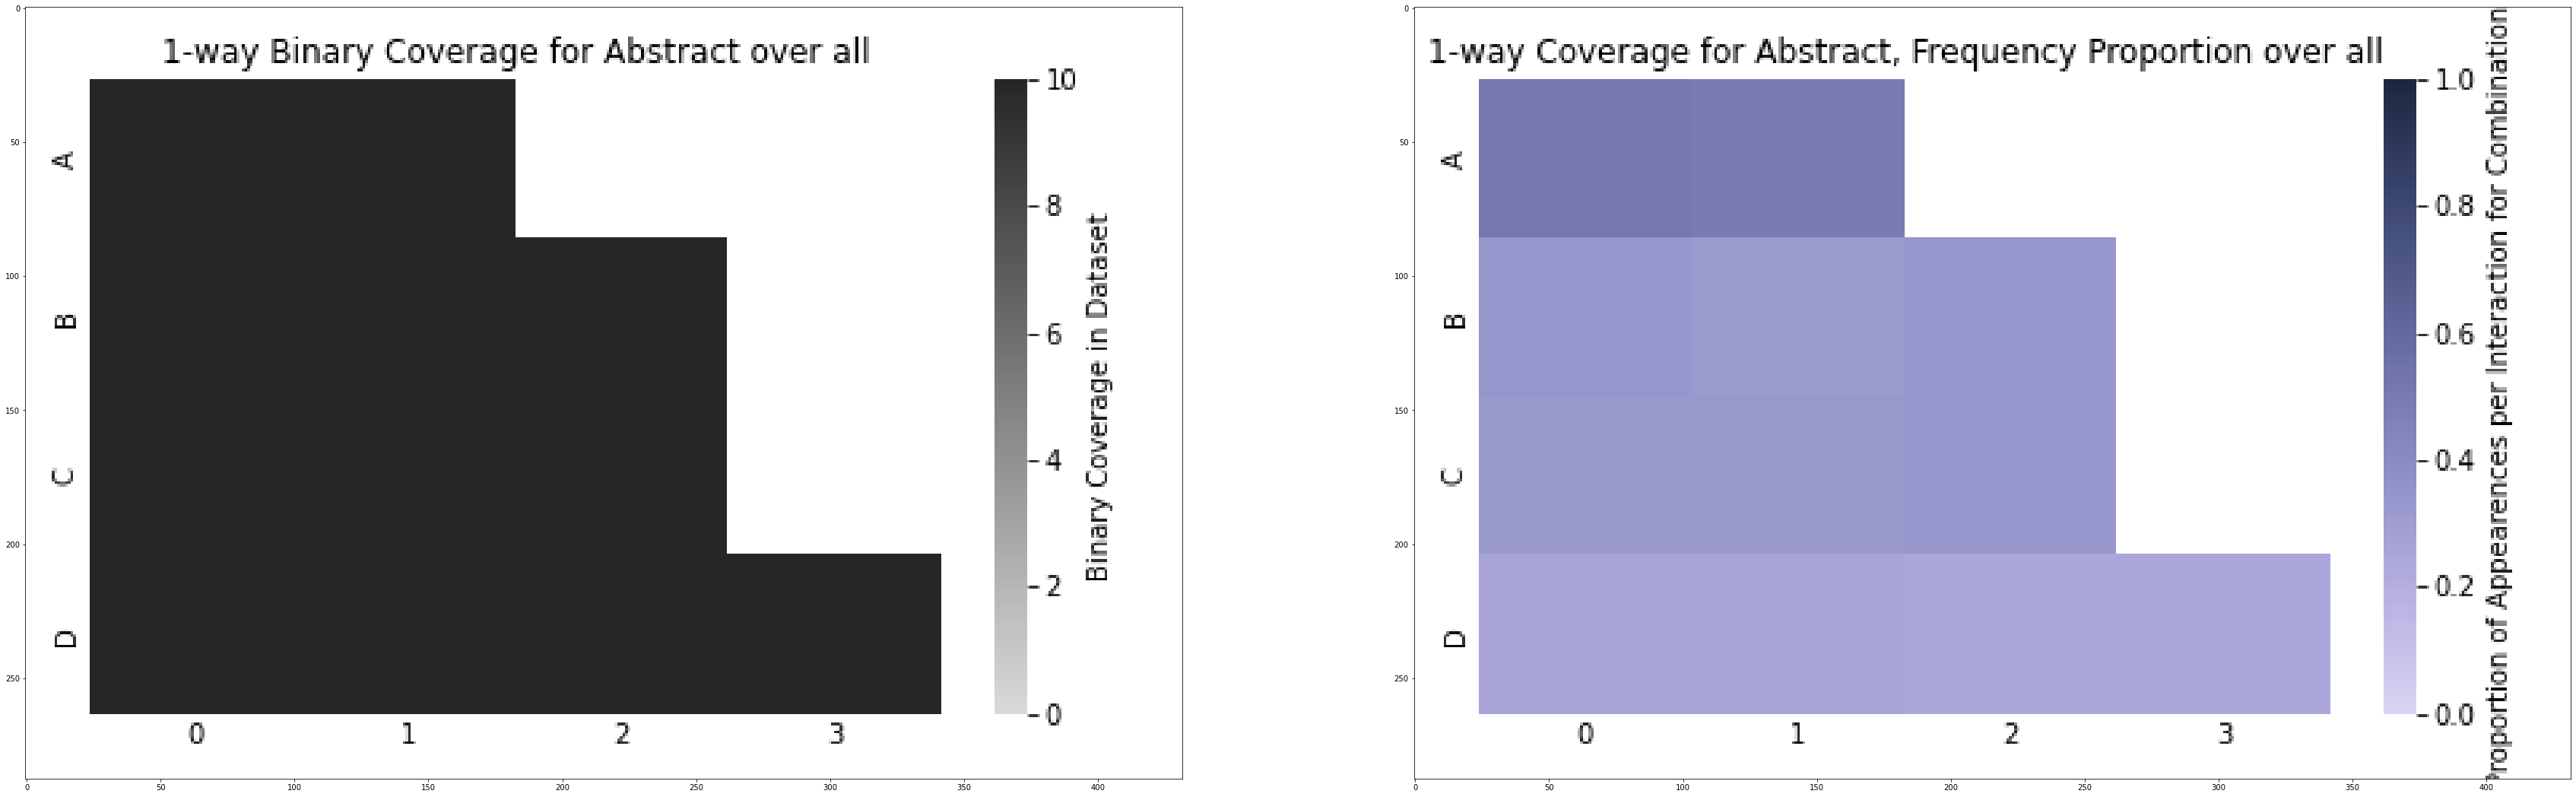

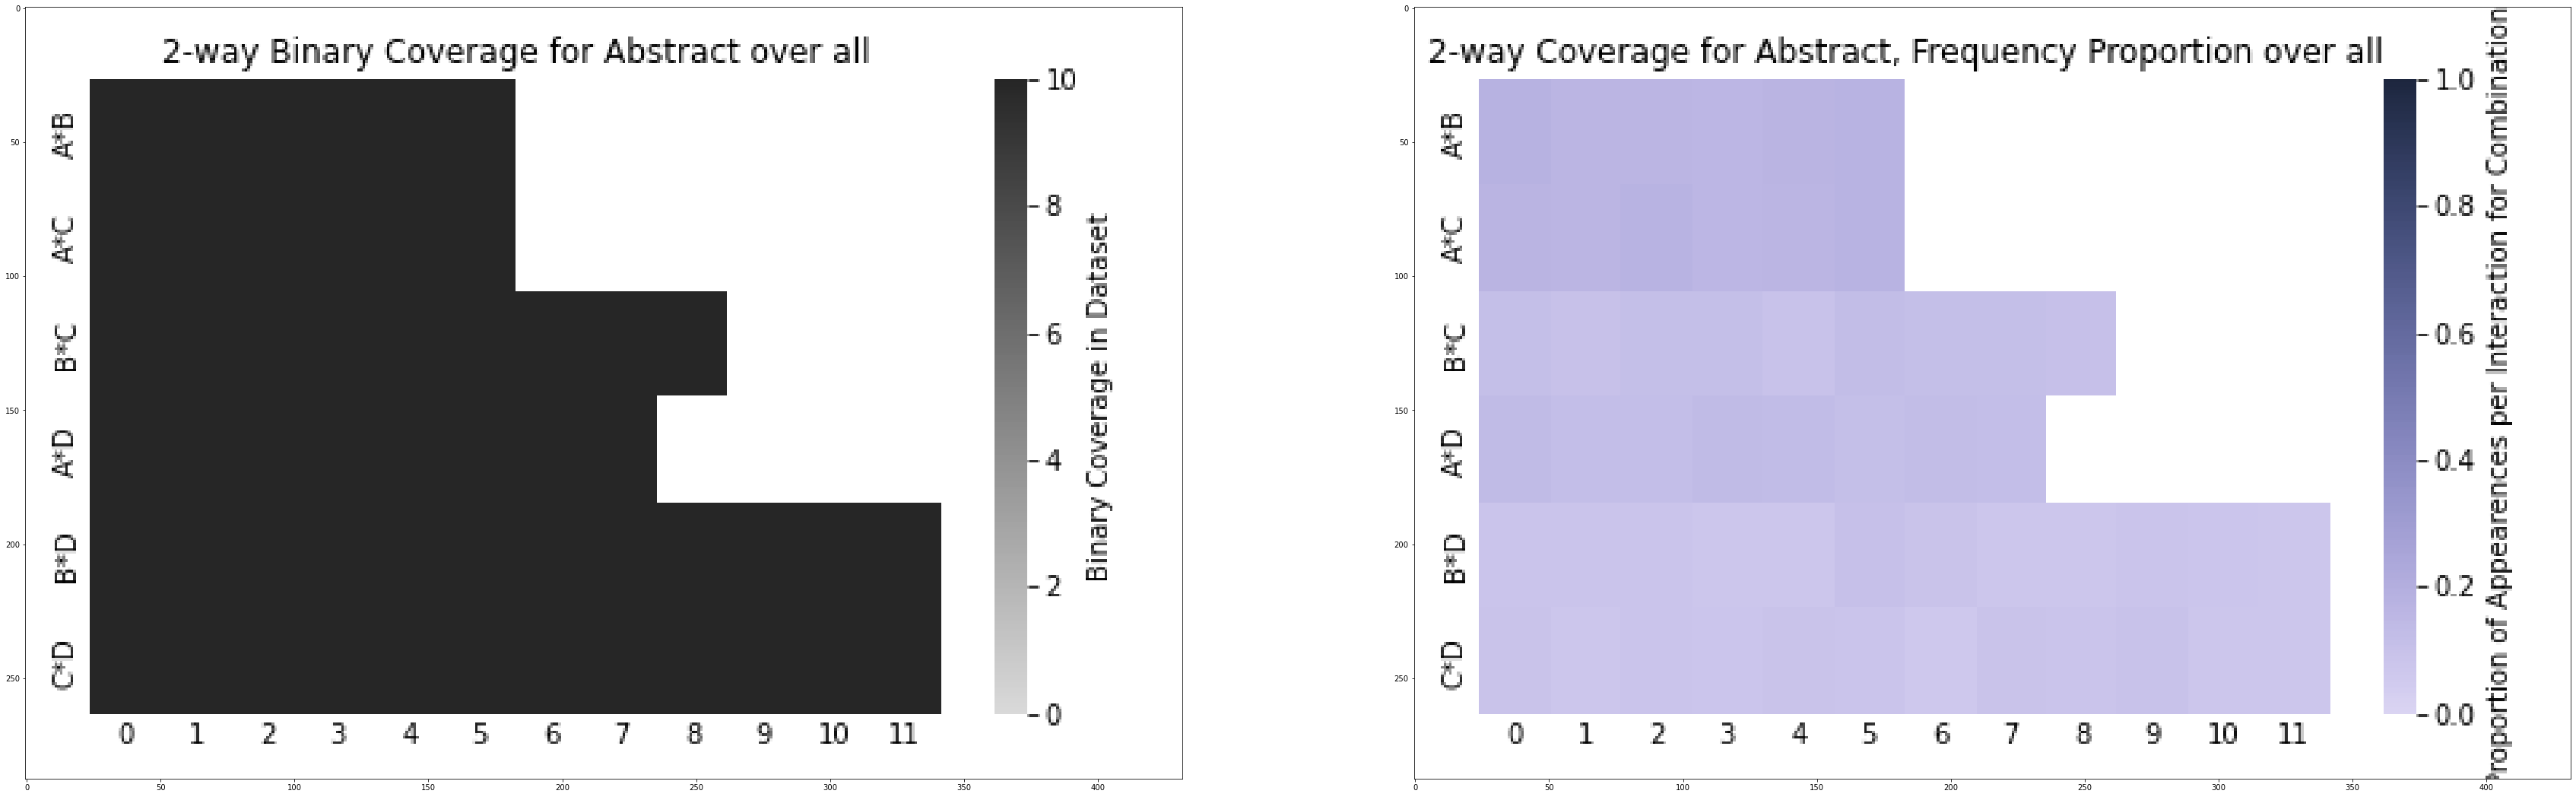

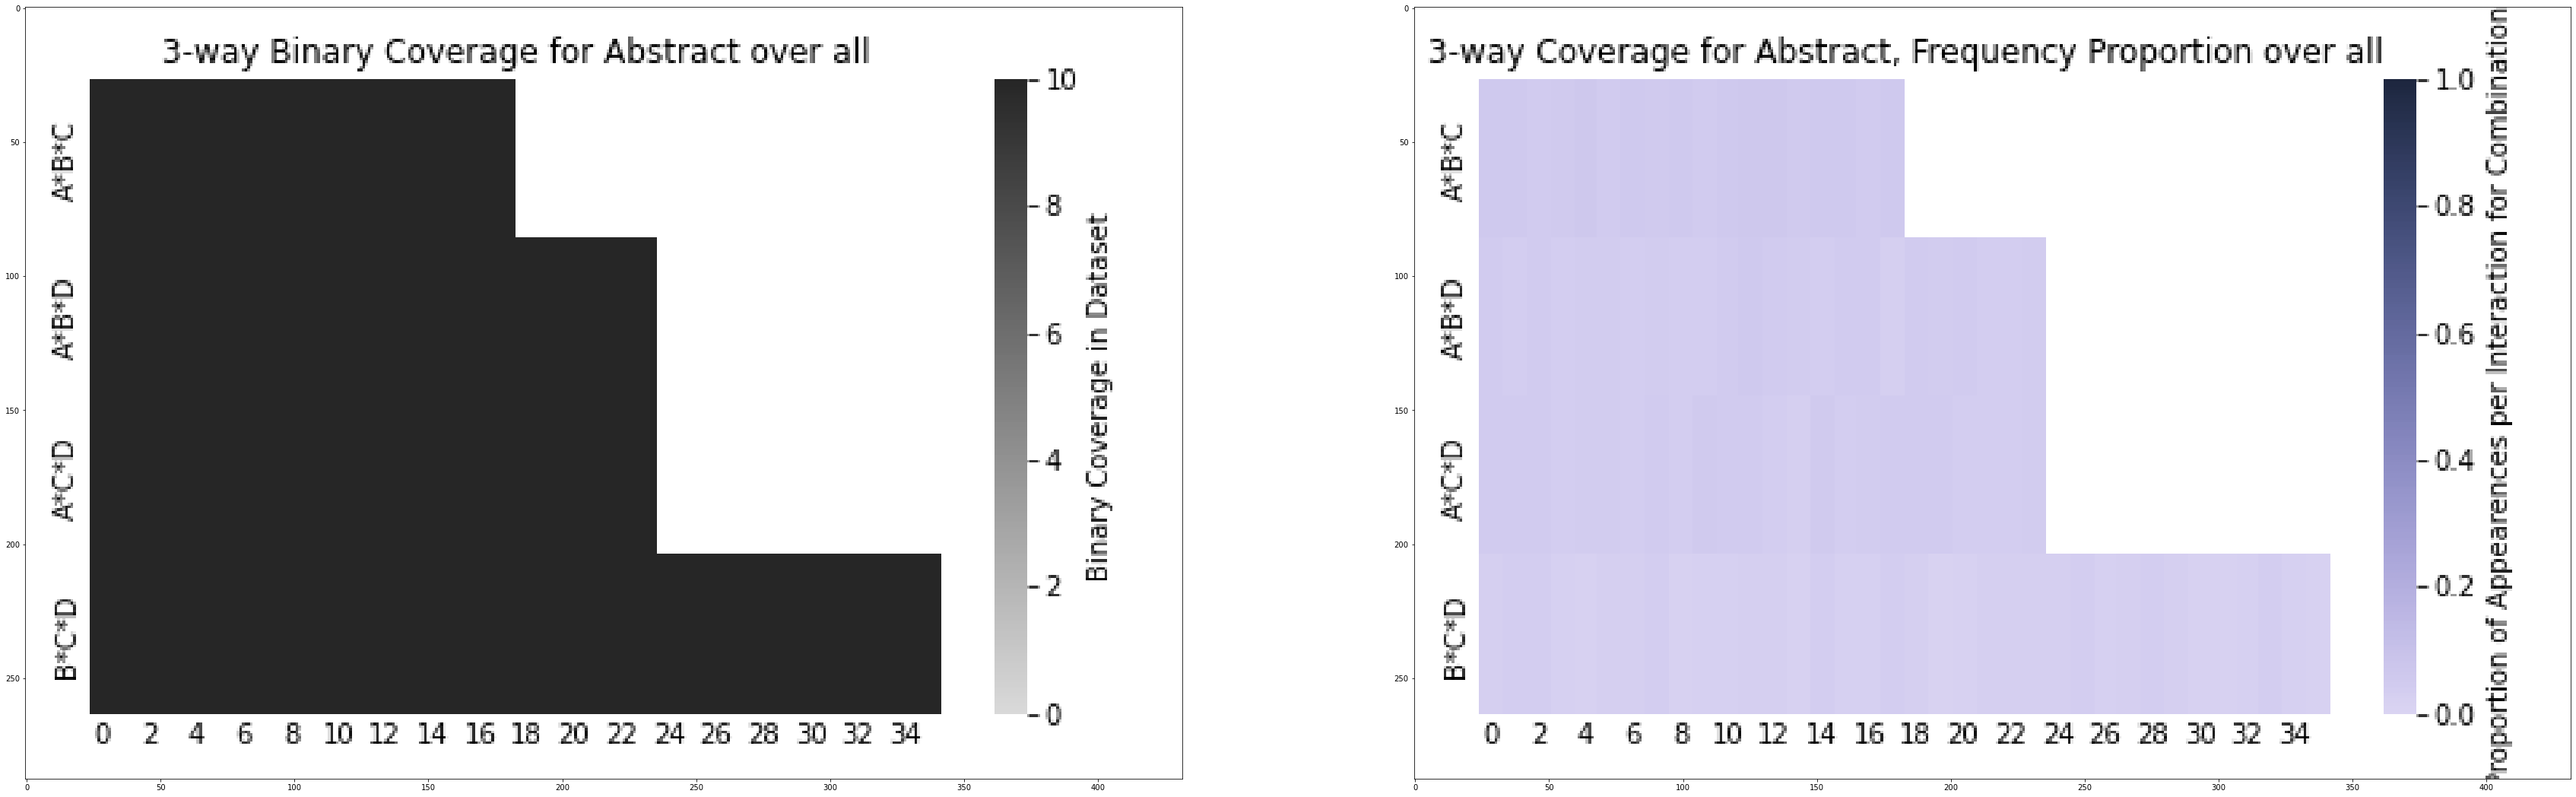

In [ ]:
"""img = Image.open(os.path.join(output_path, 'CC', 'CC_t2_Abstract_frequency_all.png'))
display(img)"""

im_a = mpimg.imread(
    os.path.join(output_path, "CC", "CC_t1_Abstract_frequency_binary_all.png")
)
im_b = mpimg.imread(
    os.path.join(output_path, "CC", "CC_t1_Abstract_frequency_proportion_all.png")
)
fig, ax = plt.subplots(1, 2, figsize=(60, 120))
ax[0].imshow(im_a)
ax[1].imshow(im_b)

im_a = mpimg.imread(
    os.path.join(output_path, "CC", "CC_t2_Abstract_frequency_binary_all.png")
)
im_b = mpimg.imread(
    os.path.join(output_path, "CC", "CC_t2_Abstract_frequency_proportion_all.png")
)
fig, ax = plt.subplots(1, 2, figsize=(60, 120))
ax[0].imshow(im_a)
ax[1].imshow(im_b)

im_a = mpimg.imread(
    os.path.join(output_path, "CC", "CC_t3_Abstract_frequency_binary_all.png")
)
im_b = mpimg.imread(
    os.path.join(output_path, "CC", "CC_t3_Abstract_frequency_proportion_all.png")
)
fig, ax = plt.subplots(1, 2, figsize=(60, 120))
ax[0].imshow(im_a)
ax[1].imshow(im_b)

In these heatmaps, the y-axis denotes each 2-way combination of features in the data, the x-axis denotes each possible level of interaction up to the maximum number of t-way interactions across all combinations in the data. Darker colors more frequent appearance.

The left, the binary heatmap indicates whether the interaction is simply present in the data or not. A more in-depth analysis lies in the right heatmap, which measures the proportion of appearances that an interaction appears for a certain t-way combination. 

Because this abstract dataset was generated with a uniform distribution across values, we expect the similarity in cell colors in the frequency proprotion plot. Even with some slight differences, this dataset appears relatively well balanced.

### 2) Skew and bias
To further the understanding of finding distribution of interactions in the data, we can examine a case in which the dataset is skewed. In this example, variable are skewed towards lower values.

In [ ]:
codex_input["dataset_file"] = "abstract_skew.csv"
codex_input["bin_file"] = "tutorial_materials/binning/bins-abstract-disc.txt"
dataset_full = pd.read_csv(
    os.path.join("tutorial_materials", "datasets_tabular", "abstract_skew.csv")
)

for feature in features:
    col = dataset_full[feature]
    for value in col.unique().tolist():
        print(
            "{}: {} appearances of {}".format(feature, col.value_counts()[value], value)
        )
    print("")

A: 911 appearances of a1
A: 89 appearances of a2

B: 725 appearances of b1
B: 275 appearances of b2

C: 361 appearances of c2
C: 451 appearances of c1
C: 188 appearances of c3

D: 125 appearances of d3
D: 487 appearances of d1
D: 247 appearances of d2
D: 141 appearances of d4



In [ ]:
results_full = codex.run(codex_input)
print("Combinatorial coverage for t=1 interactions:", results_full[1]["CC"])
print("Combinatorial coverage for t=2 interactions:", results_full[2]["CC"])
print("Combinatorial coverage for t=3 interactions:", results_full[3]["CC"])

Combinatorial coverage for t=1 interactions: 1.0
Combinatorial coverage for t=2 interactions: 1.0
Combinatorial coverage for t=3 interactions: 0.9868421052631579


<Figure size 432x288 with 0 Axes>

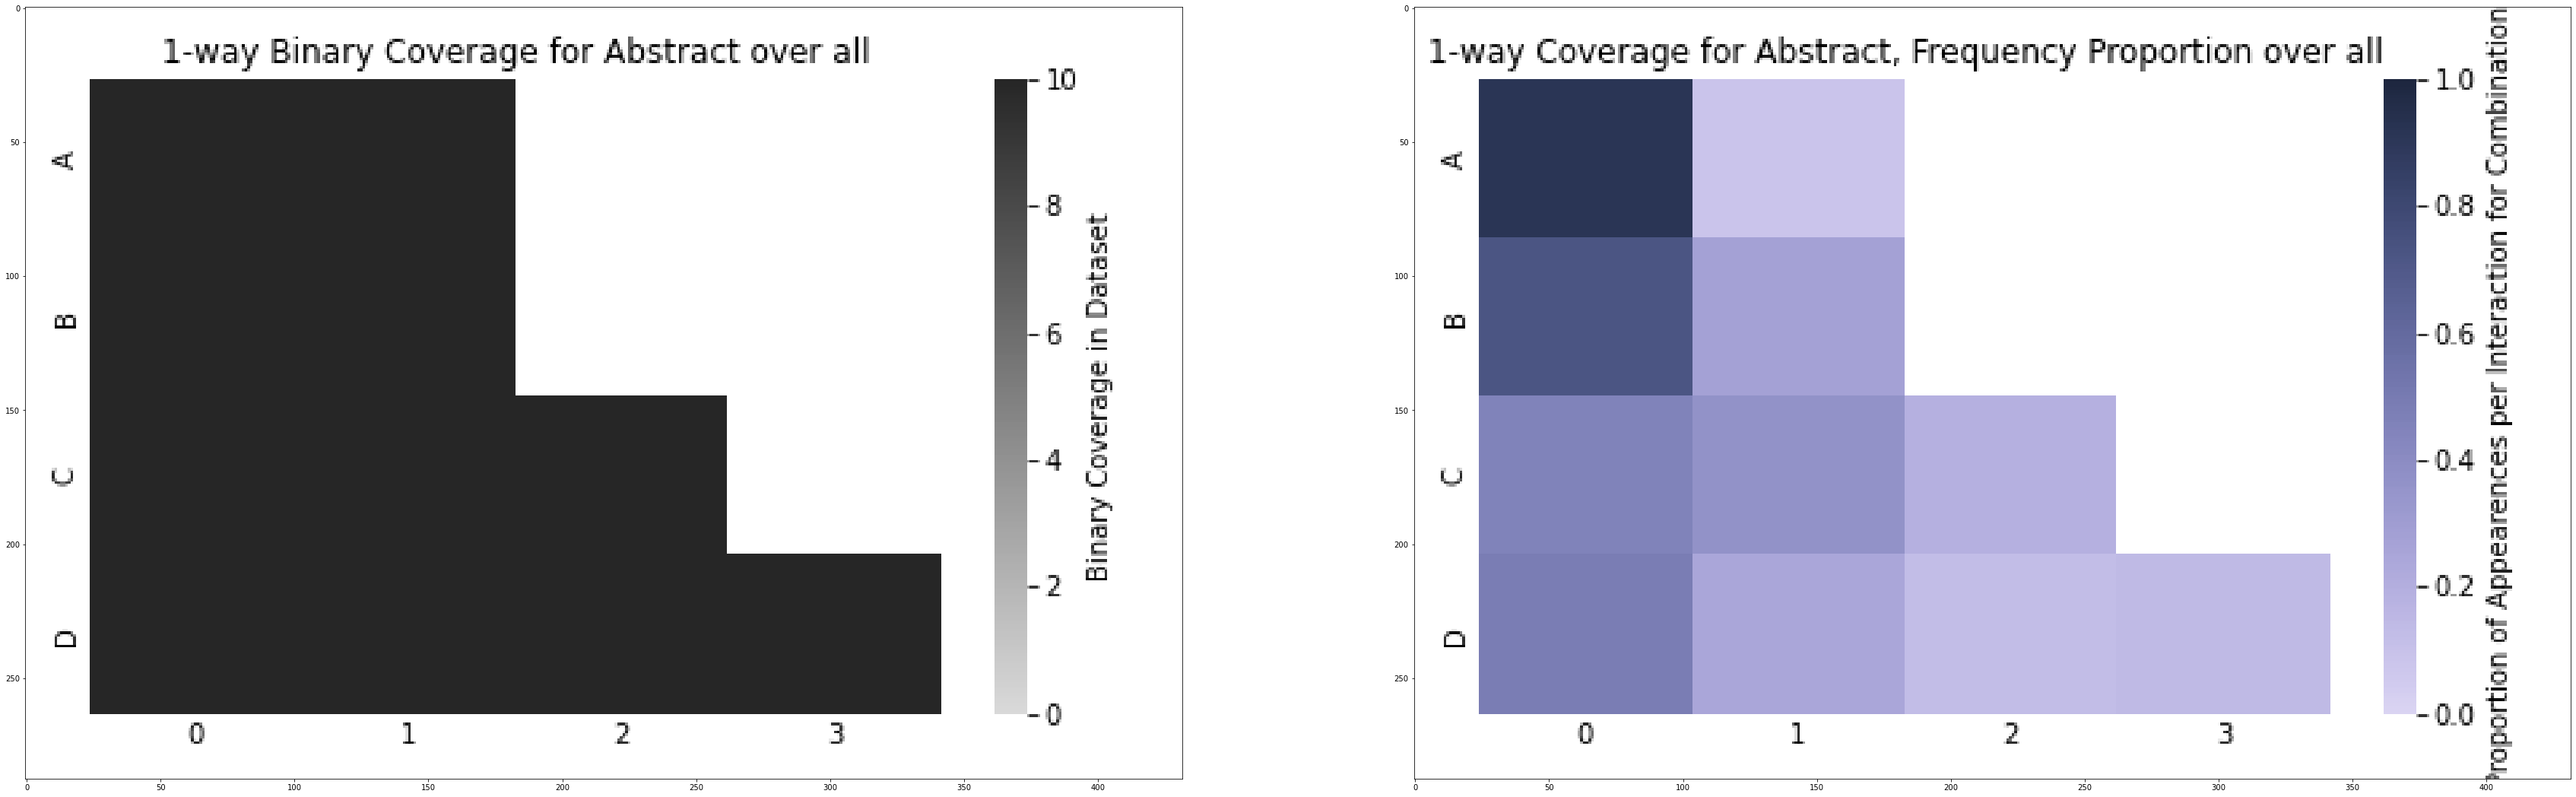

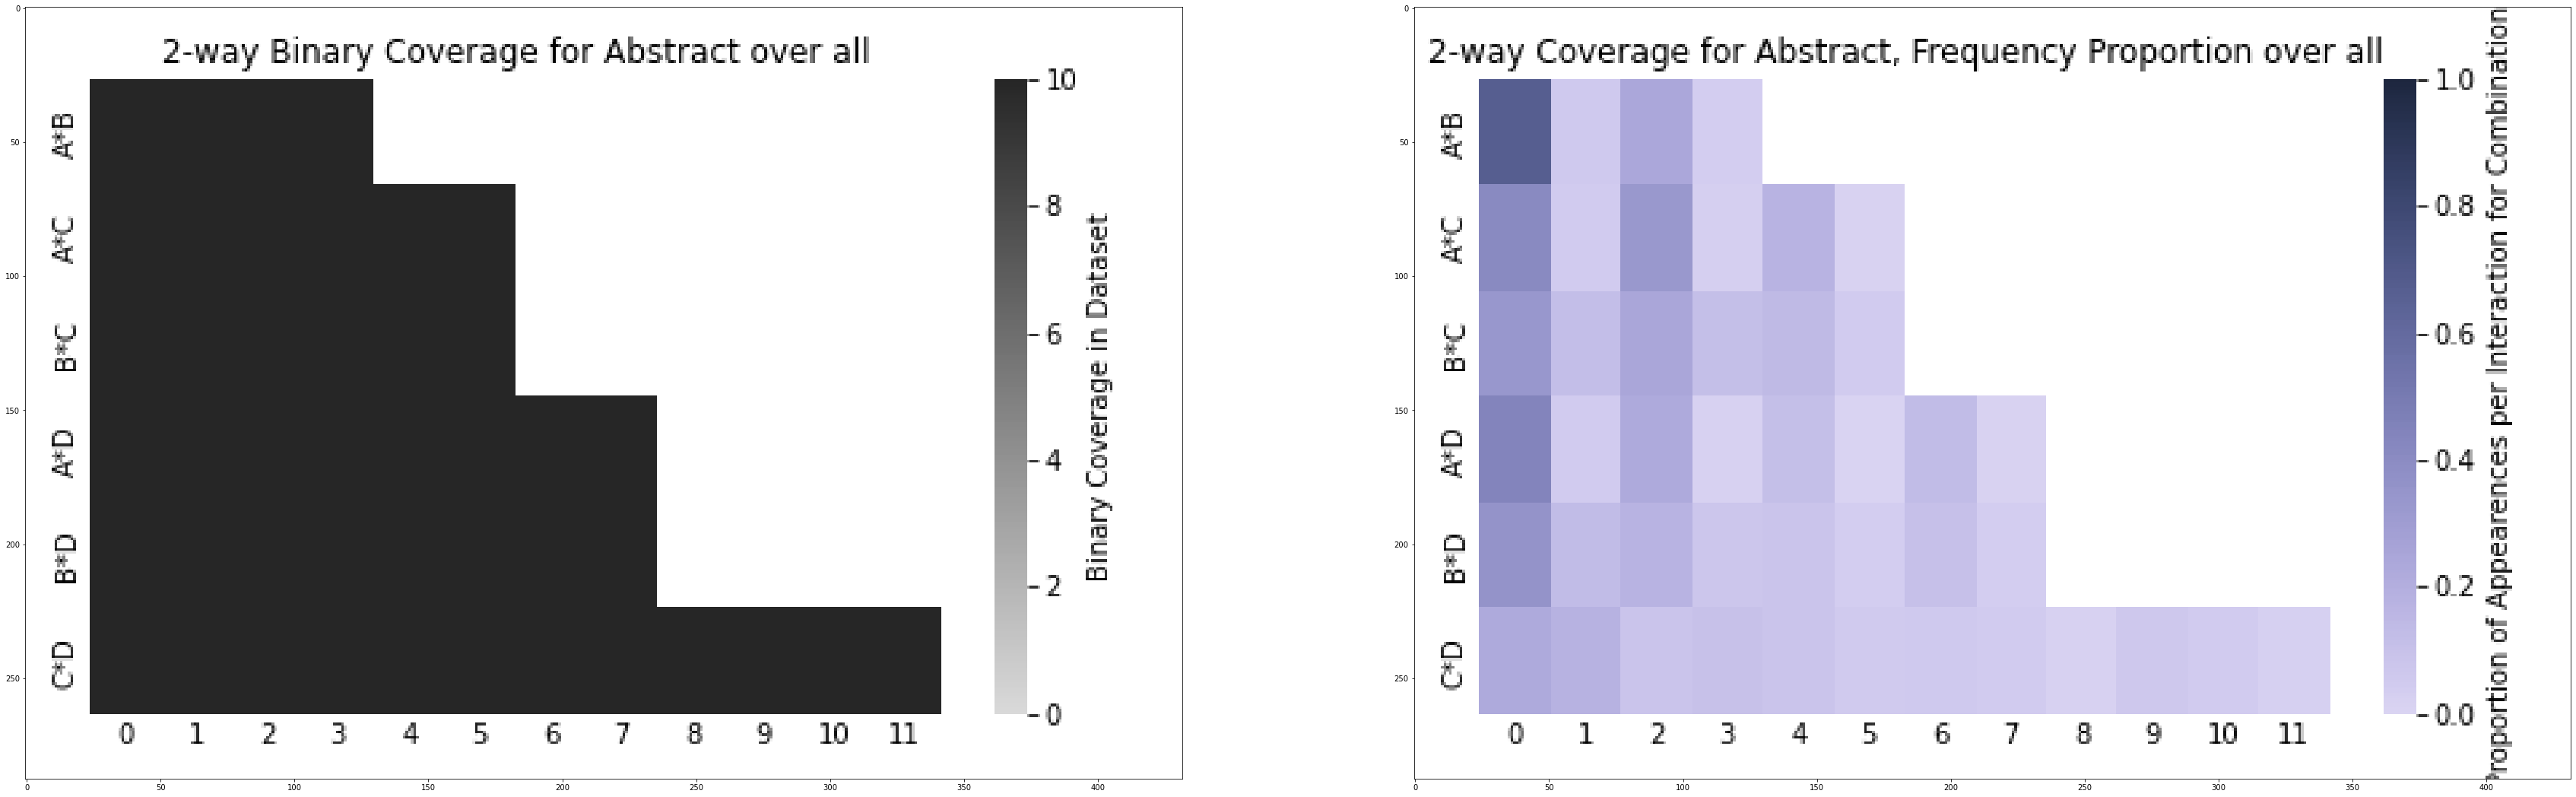

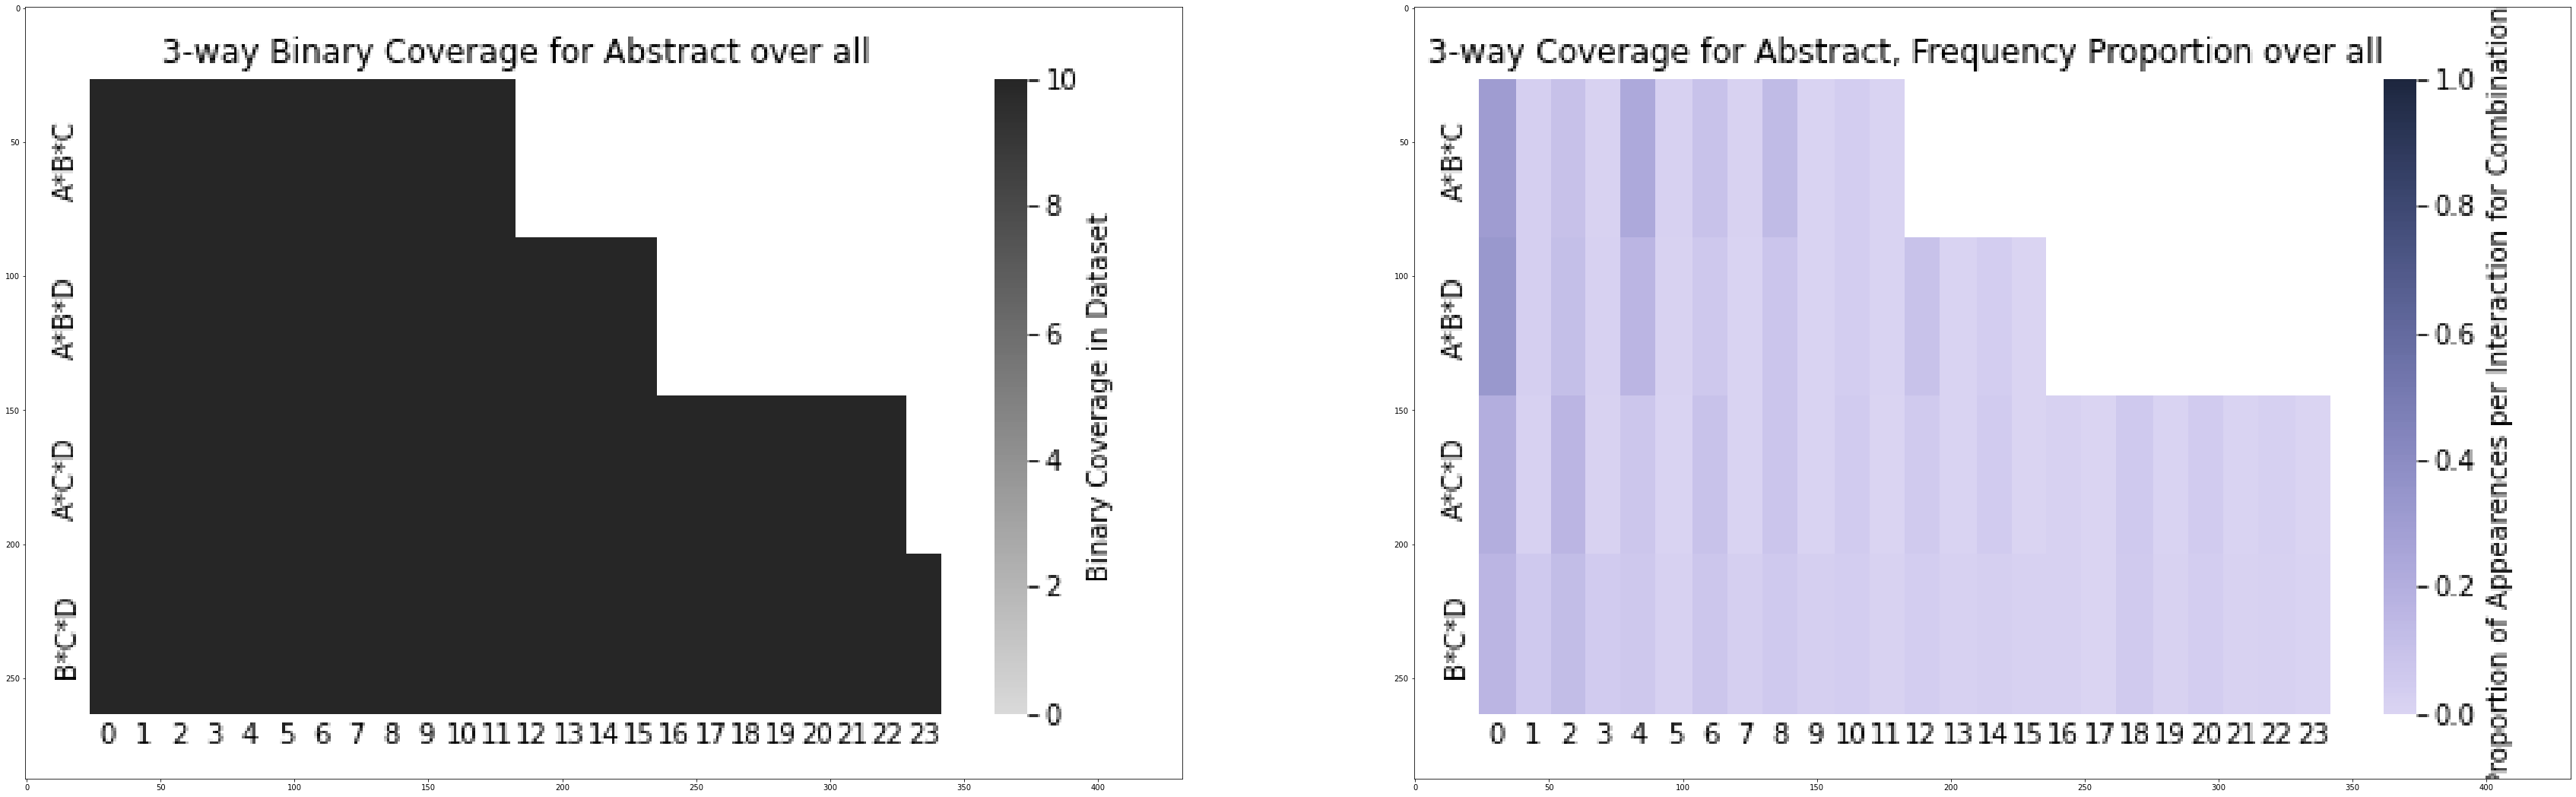

In [ ]:
# img = Image.open(os.path.join(output_path, 'CC', 'CC_t1_Abstract_frequency_proportion_all.png'))
# display(img)

im_a = mpimg.imread(
    os.path.join(output_path, "CC", "CC_t1_Abstract_frequency_binary_all.png")
)
im_b = mpimg.imread(
    os.path.join(output_path, "CC", "CC_t1_Abstract_frequency_proportion_all.png")
)
fig, ax = plt.subplots(1, 2, figsize=(60, 120))
ax[0].imshow(im_a)
ax[1].imshow(im_b)

im_a = mpimg.imread(
    os.path.join(output_path, "CC", "CC_t2_Abstract_frequency_binary_all.png")
)
im_b = mpimg.imread(
    os.path.join(output_path, "CC", "CC_t2_Abstract_frequency_proportion_all.png")
)
fig, ax = plt.subplots(1, 2, figsize=(60, 120))
ax[0].imshow(im_a)
ax[1].imshow(im_b)

im_a = mpimg.imread(
    os.path.join(output_path, "CC", "CC_t3_Abstract_frequency_binary_all.png")
)
im_b = mpimg.imread(
    os.path.join(output_path, "CC", "CC_t3_Abstract_frequency_proportion_all.png")
)
fig, ax = plt.subplots(1, 2, figsize=(60, 120))
ax[0].imshow(im_a)
ax[1].imshow(im_b)

In these plots computed over the skewed dataset, while the binary coverage appears the same, there is a significant concentratin of samples with the lower values for each computed feature.

This is demonstrating that two datasets of equal $CC_t$ value can have different implciations and needs for data balancing.

### 3) Missing interaction

However, datasets might Now consider a dataset in which a particular interaction is altogether absent. Consider the dataset that, at the 2-way interaction level, has no samples with feautre B=b1 and feature D=d2 following dataframe has the 2-way interaction of the b1 level of feature B and d2 level of feature D removed. 

In [ ]:
deficient_df = pd.read_csv(
    os.path.join(codex_input["data_directory"], "abstract_subset-b1_d2-t2.csv")
).drop("Unnamed: 0", axis=1)
display(deficient_df[deficient_df.B == "b1"][deficient_df.D == "d2"].reset_index())

/tmp/ipykernel_3533862/3938155938.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(deficient_df[deficient_df.B == 'b1'][deficient_df.D == 'd2'].reset_index())


,index,id,A,B,C,D,lab


In [ ]:
codex_input["dataset_file"] = "abstract_subset-b1_d2-t2.csv"
results_b1d2_missing = codex.run(codex_input)

print("t=1:", results_b1d2_missing[1]["CC"])
print("t=2:", results_b1d2_missing[2]["CC"])
print("t=3:", results_b1d2_missing[3]["CC"])

t=1: 1.0
t=2: 0.9772727272727273
t=3: 0.9342105263157895


<Figure size 432x288 with 0 Axes>

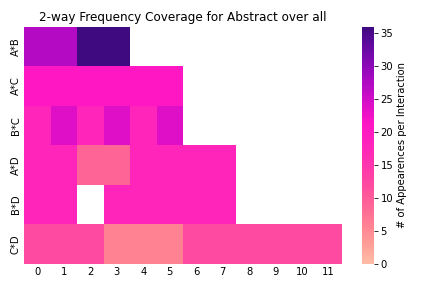

In [ ]:
img = Image.open(os.path.join(output_path, "CC", "CC_t2_Abstract_frequency_all.png"))
display(img)

In these results, full coverage is not attained. The coverage map represents this gap in the data with a cell of white for an missing interaction. If a model were to train on this dataset, the model would not see samples with features or metadata features b1 for feature B and d2 for feature D.


### Example on RarePlanes

Dataset evaluation can be run on any dataset as long a tabular dataset, features to compute over are provided. This can be demonstrated on the RarePlanes dataset. 

RarePlanes is an open source dataset consisting of real and synthetic images. Of the real dataset, 253 satellite images are distributed among 8,525 image tiles. Provided tabular metadata is included, and this is a case in which CODEX can be used to explore a dataset that itself is not tabular in its original form.

Below is one such tile, along with its associated metadata. The associated metadata belongs to the original sample.


image_tile_id                             98_104001000F15D300_tile_177
image_id                                           98_104001000F15D300
loc_id                                                              98
Country                                                            USA
State_Province                                                 Florida
Air_Field                                                 Witham Field
Latitude                                                     27.183153
Longitude                                                   -80.224886
Weather                                                    Clear Skies
Time_of_Day                                                        Day
Hour_of_Day                                                      12.05
Season                                                          Summer
avg_sun_elevation_angle                                      67.557785
off_nadir_max                                                20.748598
avg_pa

,image_tile_id,image_id,loc_id,Country,State_Province,Air_Field,Latitude,Longitude,Weather,Time_of_Day,Hour_of_Day,Season,avg_sun_elevation_angle,off_nadir_max,avg_pan_resolution,biome,realm,CONTROL
image_tile_id,,,,,,,,,,,,,,,,,,
98_104001000F15D300_tile_177,98_104001000F15D300_tile_177,98_104001000F15D300,98,USA,Florida,Witham Field,27.183153,-80.224886,Clear Skies,Day,12.05,Summer,67.557785,20.748598,0.342832,"Temperate Grasslands, Savannas & Shrublands",Nearctic,3


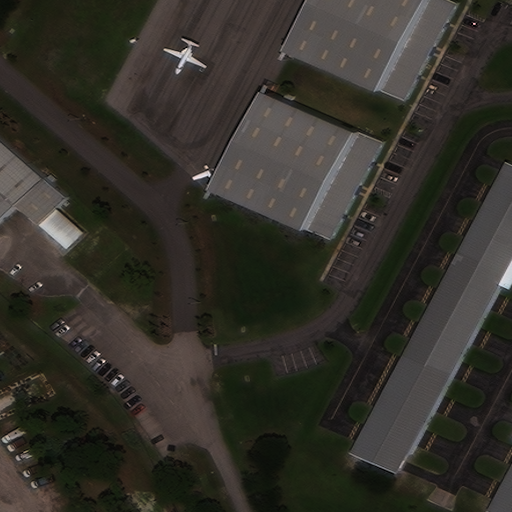

In [ ]:
rareplanes_df = pd.read_csv(
    os.path.join(
        "tutorial_materials",
        "datasets_tabular",
        "RarePlanes_Metadata_Augmented_Processed_localized-tiled-controlpt.csv",
    )
).drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)
rareplanes_df.index = rareplanes_df.image_tile_id

display(rareplanes_df.loc["98_104001000F15D300_tile_177"])
display(rareplanes_df[rareplanes_df.index == "98_104001000F15D300_tile_177"])

img = Image.open(os.path.join("..", "assets", "98_104001000F15D300_tile_177.png"))
display(img)

In [ ]:
codex_input["dataset_name"] = "RarePlanes"
codex_input["dataset_file"] = (
    "RarePlanes_Metadata_Augmented_Processed_localized-tiled-controlpt.csv"
)
codex_input["features"] = [
    "Hour_of_Day",
    "Season",
    "avg_sun_elevation_angle",
    "off_nadir_max",
    "avg_pan_resolution",
    "biome",
    "CONTROL",
]
codex_input["sample_id_column"] = "image_tile_id"
codex_input["bin_file"] = "tutorial_materials/binning/bins-rareplanes_complete.txt"
results_rareplanes = codex.run(codex_input)
# output.output_json_readable(codex_input, print_json=True)

Over-abundance of levels in the dataset for avg_sun_elevation_angle. Consider if this feature requires a binning file.


<Figure size 432x288 with 0 Axes>

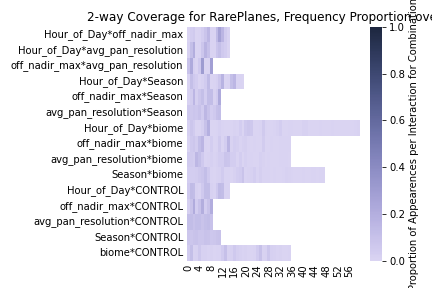

In [ ]:
img = Image.open(
    os.path.join(output_path, "CC", "CC_t2_RarePlanes_frequency_proportion_all.png")
)
display(img)

Dataset evaluation can be a useful mode to characterize a dataset's overall coverage, and what interactions are present or deficient. In machine learning, this can be handy when scoping out potential training data for a model.

## ASSEMBLING THE EXPERIMENT (USER-INPUT)

To run one's own dataset evaluation experiment, an input file will need to be written. Use this guided example to write your own input file and match the expected result.

In [ ]:
with open("tutorial_materials/input/input-TEMPLATE.json") as f:
    codex_input_demo = json.load(f)

codex_input_demo = tutorials.assemble_input_file_user(codex_input_demo)
display(codex_input_demo)

/home/hume-users/leebri2n/PROJECTS/ai-th/CODEX/__tutorials
TUTORIAL MODE MATERIALS. SELECT ITEMS FROM HERE OR PROVIDE YOUR OWN ITEMS CORRECTLY:  ['input', 'splits', 'build', 'performance', 'binning', 'subsets', 'datasets_tabular']
Selected ./ as CODEX directory.
Selected  as experiment config ID.


TypeError: join() argument must be str, bytes, or os.PathLike object, not 'NoneType'

Edit input fields that you want to correct/update.

In [ ]:
edit_field = input("EDIT FIELD NAME: ")
if edit_field != "":
    codex_input_demo[edit_field] = input(
        "CHANGE {} VALUE TO (currently {}): ".format(
            edit_field, codex_input_demo[edit_field]
        )
    )
    print("Continue running this cell for any more fields that need to be changed.")
print("Input file confirmed.")

Input file confirmed.


In [ ]:
codex.run(codex_input_demo)

FileNotFoundError: [Errno 2] No such file or directory: 'tut'